In [2]:
pip uninstall -v scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -v scikit-learn

Using pip 22.2.2 from c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pip (python 3.10)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob
import pandas as pd

In [3]:
def get_polarity(lyrics):
   return TextBlob(lyrics).sentiment.polarity

In [13]:
df = pd.read_csv(r"C:\STUDY\NLP_Toy_Proj\pre_processing\renew_dataset_final.csv")

for i in df.index.tolist():
    df.loc[i, 'polarity'] = get_polarity(df.loc[i, 'lyrics'])

df.to_csv("lyrics_polarity_dataset.csv", index=False)

max_len 54194
mean_len 768.5101591688418


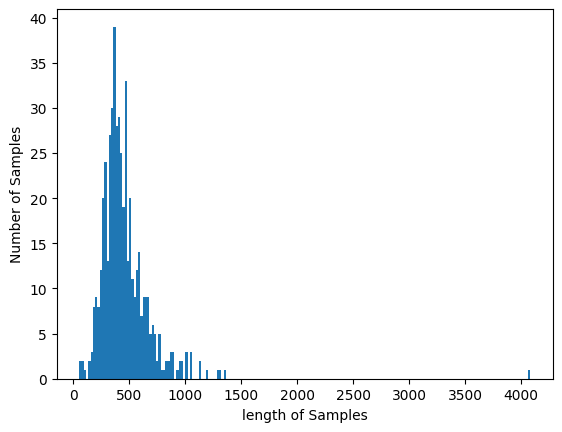

In [7]:

import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv(r"C:\STUDY\NLP_Toy_Proj\lyrics_polarity_dataset.csv")

len_list = []
for i in df.index.tolist():
    len_list.append(len(df.loc[i, 'lyrics']))

print("max_len", max(len_list))
print("mean_len", sum(len_list)/len(len_list))

plt.hist(len_list[0:500], bins=200)
plt.xlabel('length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [16]:
# from keras_preprocessing.sequence import pad_sequences
# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# import operator
# import collections

def to_list(str):
    split_str = str.split(" ")
    return split_str

def get_sent_cnt(data):
    sent_cnt = []
    neg_cnt = 0
    pos_cnt = 0
    neu_cnt = 0
    for i in data.index.tolist():
        if (float(data[i]) > float(0)):
            pos_cnt += 1
        elif (float(data[i]) < float(0)):
            neg_cnt += 1
        else:
            neu_cnt += 1
        
    sent_cnt.append(["neg_cnt", neg_cnt])
    sent_cnt.append(["neu_cnt", neu_cnt])
    sent_cnt.append(["pos_cnt", pos_cnt])
    
    return sent_cnt

def get_sent(pol):
    if (float(pol) > 0):
        return 1 # pos
    return 0 # neg + neu


df = pd.read_csv(r"C:\STUDY\NLP_Toy_Proj\lyrics_polarity_dataset.csv")

# total = []
# # for i in df.index.tolist():
# for i in range(5):
#     total.append(to_list(df.loc[i, 'lyrics']))
#     model = Word2Vec(sentences=total, window=5, min_count=0, workers=4, sg=0)
#     print(model.wv.vectors.shape)
#     sim_words = model.wv.most_similar('love')
#     print(sim_words)
    
# for i in df.index.tolist():
# train_data = []
# for i in df.index.tolist():
#     train_data.append(to_list(df.loc[i, 'lyrics']))
    
target_data = []
for i in df.index.tolist():
    df.loc[i, "str_sent"] = get_sent(df.loc[i, 'polarity'])
    
# train_df = pd.DataFrame(train_data)
# target_df = pd.DataFrame(target_data)

# feature_df = df.drop(['neg_sentiment', 'neu_sentiment', 'pos_sentiment', 'com_sentiment', 'polarity'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(df['lyrics'], df['str_sent'], test_size=0.25, random_state=32)

# total = []

# for i in df.index.tolist():
# for i in range(5):
#     total.append(to_list(df.loc[i, 'lyrics']))
    # model = Word2Vec(sentences=total, window=5, min_count=0, workers=4, sg=0)
    # print(model.wv.vectors.shape)
    # sim_words = model.wv.most_similar('love')
    # print(sim_words)


# print(X_train)
# print(X_train.shape)
# print(y_train)
# print(X_test.shape)
# print(y_test.shape)
# print(get_sent_cnt(y_train))
# print(get_sent_cnt(y_test))
# print(type(X_train.iloc[0, 0]))

KeyError: 'str_sent'

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()

tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)
print('TFIDF Vectorizer……')

TFIDF Vectorizer……


In [11]:
# model: SVM classification
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(tf_x_train, y_train)
y_test_pred = clf.predict(tf_x_test)

In [12]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_test_pred, output_dict=True)
print(report)

{'0.0': {'precision': 0.8783702816057519, 'recall': 0.8315371525808282, 'f1-score': 0.8543123543123543, 'support': 1763}, '1.0': {'precision': 0.9076492537313433, 'recall': 0.9349775784753364, 'f1-score': 0.9211107604922688, 'support': 3122}, 'accuracy': 0.8976458546571137, 'macro avg': {'precision': 0.8930097676685476, 'recall': 0.8832573655280822, 'f1-score': 0.8877115574023116, 'support': 4885}, 'weighted avg': {'precision': 0.8970824517134482, 'recall': 0.8976458546571137, 'f1-score': 0.8970031678422813, 'support': 4885}}
